### CNN Modlet without using Data Augmentation

Without using data augmentation, the CNN model was giving 88.06%, but after using data augmentation the model was provided 14 to 17% accuracy.

In [1]:
import os
import re
import glob
import cv2
import numpy as np

path = os.path.abspath('C:\\Users\\jeetp\\Desktop\\ML Course\\Final Project\\NEU surface defect database\\')
path = re.sub('[a-zA-Z\s._]+$', '', path)
dirs = os.listdir(path)

X = []
y = []

for i in dirs:
    count = 0
    for pic in glob.glob(path+i+'/*.bmp'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(150,150))
        im = np.array(im)
        count = count + 1
        X.append(im)

        if 'Cr_' in pic:
            y.append(0)
        elif 'In_' in pic:
            y.append(1)
        elif 'Pa_' in pic:
            y.append(2)
        elif 'PS_' in pic:
            y.append(3)
        elif 'RS_' in pic:
            y.append(4)
        elif 'Sc_' in pic:
            y.append(5)
    if (count > 0):
        print("Count "+str(i)+" : "+str(count))

X = np.array(X)
y = np.array(y)


Count NEU surface defect database : 1800


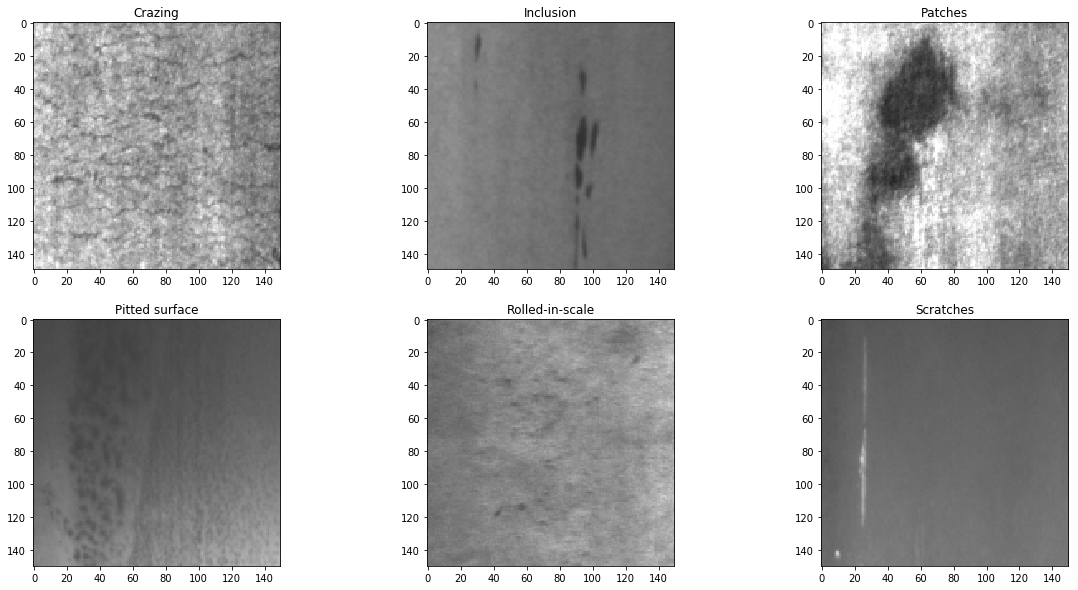

In [2]:
#Lets view some of the pics

import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(20,10))
columns = 6
label = {0:'Crazing', 1:'Inclusion', 2:'Patches', 3:'Pitted surface', 4:'Rolled-in-scale', 5:'Scratches'}
n=0
for i in range(columns):
    plt.subplot(6/ columns + 1, 3, i + 1)
    plt.title(label[y[n]])
    plt.imshow(X[n])
    n += 300

Text(0.5, 1.0, 'Still defects by Classification')

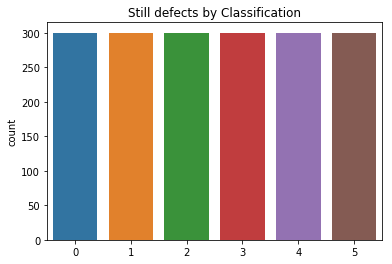

In [10]:
import seaborn as sns

sns.countplot(y)
plt.title('Still defects by Classification')

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import tensorflow
from tensorflow.python import keras
from keras.utils import to_categorical

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [12]:
print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (1440, 150, 150, 3)
Shape of validation images is: (360, 150, 150, 3)
Shape of labels is: (1440, 6)
Shape of labels is: (360, 6)


In [4]:
import keras
##from keras.utils.visualize_util import to_graph
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
epochs = 32
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

W0817 17:21:17.295594 16700 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 17:21:17.341910 16700 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 17:21:17.358016 16700 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 17:21:17.396730 16700 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0817 17:21:17.439765 16700 deprecation_wrapper.py:119] From C:\Users\jeetp\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10616960  
__________

In [5]:
model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=32)

W0817 17:21:18.090422 16700 deprecation.py:323] From C:\Users\jeetp\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1296 samples, validate on 144 samples
Epoch 1/32
1296/1296 [==============================] - 18s 14ms/step - loss: 1.7773 - acc: 0.1713 - val_loss: 1.7458 - val_acc: 0.1944
Epoch 2/32
1296/1296 [==============================] - 7s 5ms/step - loss: 1.7388 - acc: 0.2083 - val_loss: 1.6936 - val_acc: 0.3611
Epoch 3/32
1296/1296 [==============================] - 7s 5ms/step - loss: 1.6911 - acc: 0.2832 - val_loss: 1.6289 - val_acc: 0.3056
Epoch 4/32
1296/1296 [==============================] - 7s 5ms/step - loss: 1.6314 - acc: 0.3349 - val_loss: 1.5445 - val_acc: 0.3472
Epoch 5/32
1296/1296 [==============================] - 7s 5ms/step - loss: 1.5609 - acc: 0.3465 - val_loss: 1.4857 - val_acc: 0.4236
Epoch 6/32
1296/1296 [==============================] - 7s 5ms/step - loss: 1.5010 - acc: 0.3657 - val_loss: 1.4469 - val_acc: 0.4375
Epoch 7/32
1296/1296 [==============================] - 7s 5ms/step - loss: 1.4701 - acc: 0.3943 - val_loss: 1.4358 - val_acc: 0.4167
Epoch 8/32
12

In [6]:
scores = model.evaluate(X_test, y_test, verbose=0)
y_prediction = model.predict(X_test, verbose=0)

In [7]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.06%
